# Exercise 3: Using kNN for classification of Wheat Seeds

# Task 1: Get the data and load it to an appropriate data structure

The dataset can be downloaded from: https://archive.ics.uci.edu/dataset/236/seedsimport

This can be done by, e.g. using curl: curl -o seeds.zip https://archive.ics.uci.edu/static/public/236/seeds.zip

In a next step, load the data to a pandas Dataframe. If you encounter any issues think about how you could solve them.
You can load the data using pandas directly using `pd.read_csv(..., sep='\t') as the file is tab separted. 
Or you can loop over an open file handle and append the data to a list which you can then convert to a pandas DataFrame.
```python
data = []
with open('seeds_dataset.txt') as f:
pass
```

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
rows = []
with open('seeds_dataset.txt') as f:
    for line in f:
        row = line.strip().split()
        rows.append(row)
data = pd.DataFrame(rows, columns=['area', 'perimeter', 'compactness', 
                                   'length', 'width', 'asymmetry', 'groove', 'class'])
data.head(20)


,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.1,0.8911,5.42,3.302,2.7,5,1
8,16.63,15.46,0.8747,6.053,3.465,2.04,5.877,1
9,16.44,15.25,0.888,5.884,3.505,1.969,5.533,1


In [36]:
data = pd.read_csv('./seeds_updated.txt', sep='\t', header=None)
data.rename(columns={0: 'area', 1: 'perimeter', 2: 'compactness', 3: 'length',
                      4: 'width', 5: 'asymmetry', 6: 'groove', 7: 'class'}, inplace=True)
# ❯ cat seeds_dataset.txt | sed -e 's/\t\t/\t/g' > seeds_updated.txt 
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
data = pd.read_csv('./seeds_dataset.txt', sep='\t', header=None)

## Task 1.1: Rename the columns to something more descriptive (see the dataset description for that)

In [4]:
len(data)

210

# Task 1.2: Look at the data and get a feeling for it
Use
```python
df.head()
df.describe()
```
or plot some histograms of the dataset to get a feeling for the data.

In [33]:
data.tail()
data.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [37]:
data.describe()

,area,perimeter,compactness,length,width,asymmetry,groove,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [38]:
data['class'].value_counts()

class
1    70
2    70
3    70
Name: count, dtype: int64

# Task 2: Implement the kNN algorithm using sklearn
Split the data into a training and a test set. Use the kNN algorithm from sklearn to classify the data.
Use accuracy (the fraction of correctly classified instances) as a metric to evaluate the performance of the algorithm.
Use 20% of the data as test set and the rest as training set.
Example of how to split the data:
```python
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
```
More details can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


# Task 2.1 Split the data
Use 20\% of the data as test set and the rest as training set.
Question to ask yourself: 
- Why do we need to split the data?
- What is the randdom state?

In [39]:
from sklearn.model_selection import train_test_split
X, y = data.drop('class', axis=1), data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 2.2. Implement the kNN algorithm and predict the test set samples with the trained model. 
```python
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
```
Use the fit and predict functions of the model to train and predict the data.

In [41]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

# Task 2.3 Check the accuracy of the model using your own implementation of the accuracy function (fraction of correctly classified examples). 
Now compare the accuracy of the model with different values of k.  (e.g. 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21). You can use a loop for that.

In [40]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [42]:
print(accuracy(y_test, y_pred))

0.8809523809523809


accuracy for k = 1: 0.9047619047619048
accuracy for k = 3: 0.8809523809523809
accuracy for k = 5: 0.9285714285714286
accuracy for k = 7: 0.9047619047619048
accuracy for k = 9: 0.9047619047619048
accuracy for k = 11: 0.9047619047619048
accuracy for k = 13: 0.8809523809523809
accuracy for k = 15: 0.8571428571428571
accuracy for k = 17: 0.9047619047619048
accuracy for k = 19: 0.8809523809523809


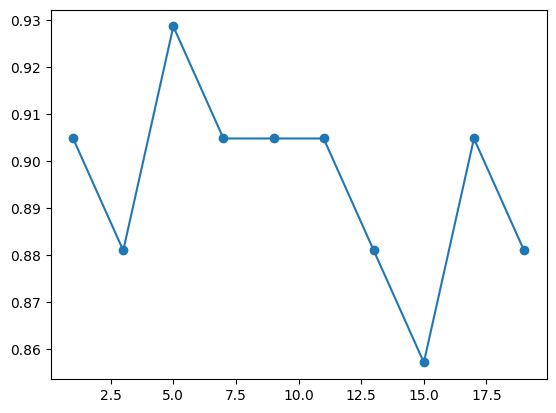

In [43]:
accs = {}
for k in range(1, 20, 2):
    neigh = KNeighborsClassifier(n_neighbors=k)
    # neigh.fit(X_train[['area', 'perimeter']], y_train)
    # y_pred = neigh.predict(X_test[['area', 'perimeter']])
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accs[k] = accuracy(y_test, y_pred)

    print(f'accuracy for k = {k}: {accs[k]}')
plt.plot(list(accs.keys()), list(accs.values()), marker='o')

# Bonus Task: Use PCA to reduce the dimensionality to two and plot the data with colorized labels.
`import matplotlib.pyplot as plt` and `plt.scatter` will come in handy. 
You can use the PCA class from sklearn to reduce the dimensionality of the data. 
```python
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
```

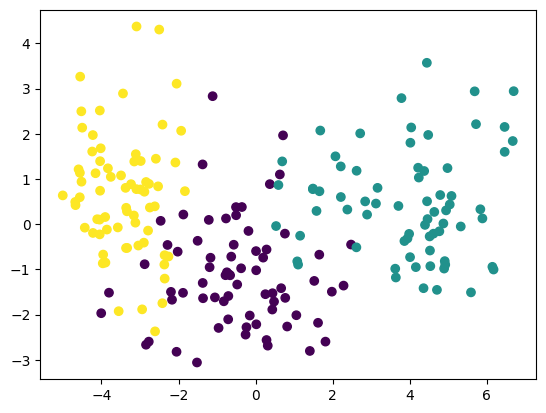

In [44]:
from sklearn.decomposition import PCA
data_pca = PCA(n_components=2).fit_transform(data.drop('class', axis=1))
data_pca = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
data_pca['class'] = data['class']
plt.scatter(data_pca['PC1'], data_pca['PC2'], c=data_pca['class'].astype('category').cat.codes)
